ESTE MODELO SE TRATA DE UNA COPIA DEL MODELO 1 PERO ESCALANDO

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("../data/datos_modificados.csv")
data=data.drop(columns="id")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               31644 non-null  object 
 1   geometry             31644 non-null  object 
 2   pressure [MPa]       31644 non-null  float64
 3   mass_flux [kg/m2-s]  31644 non-null  float64
 4   x_e_out [-]          21229 non-null  float64
 5   D_e [mm]             31644 non-null  float64
 6   D_h [mm]             31644 non-null  float64
 7   length [mm]          31644 non-null  float64
 8   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


In [4]:
data_usable=data[data["x_e_out [-]"].notnull()].copy()
prediction=data[data["x_e_out [-]"].isnull()].copy()

<AxesSubplot:>

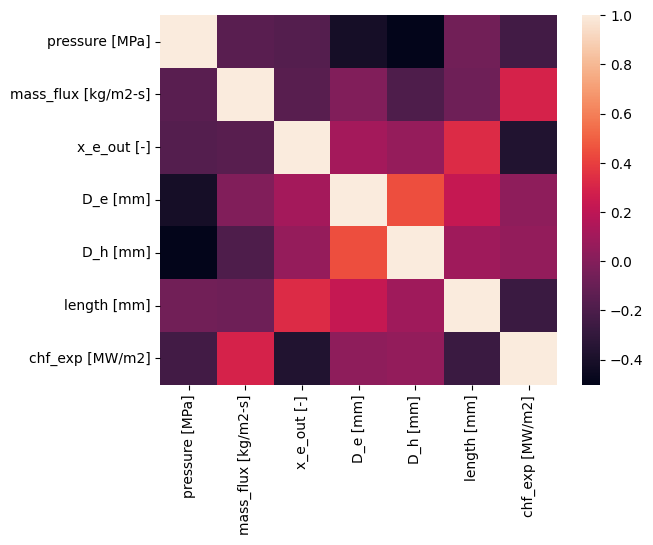

In [5]:
corr_train=data_usable.corr()
import seaborn as sns
sns.heatmap(corr_train)

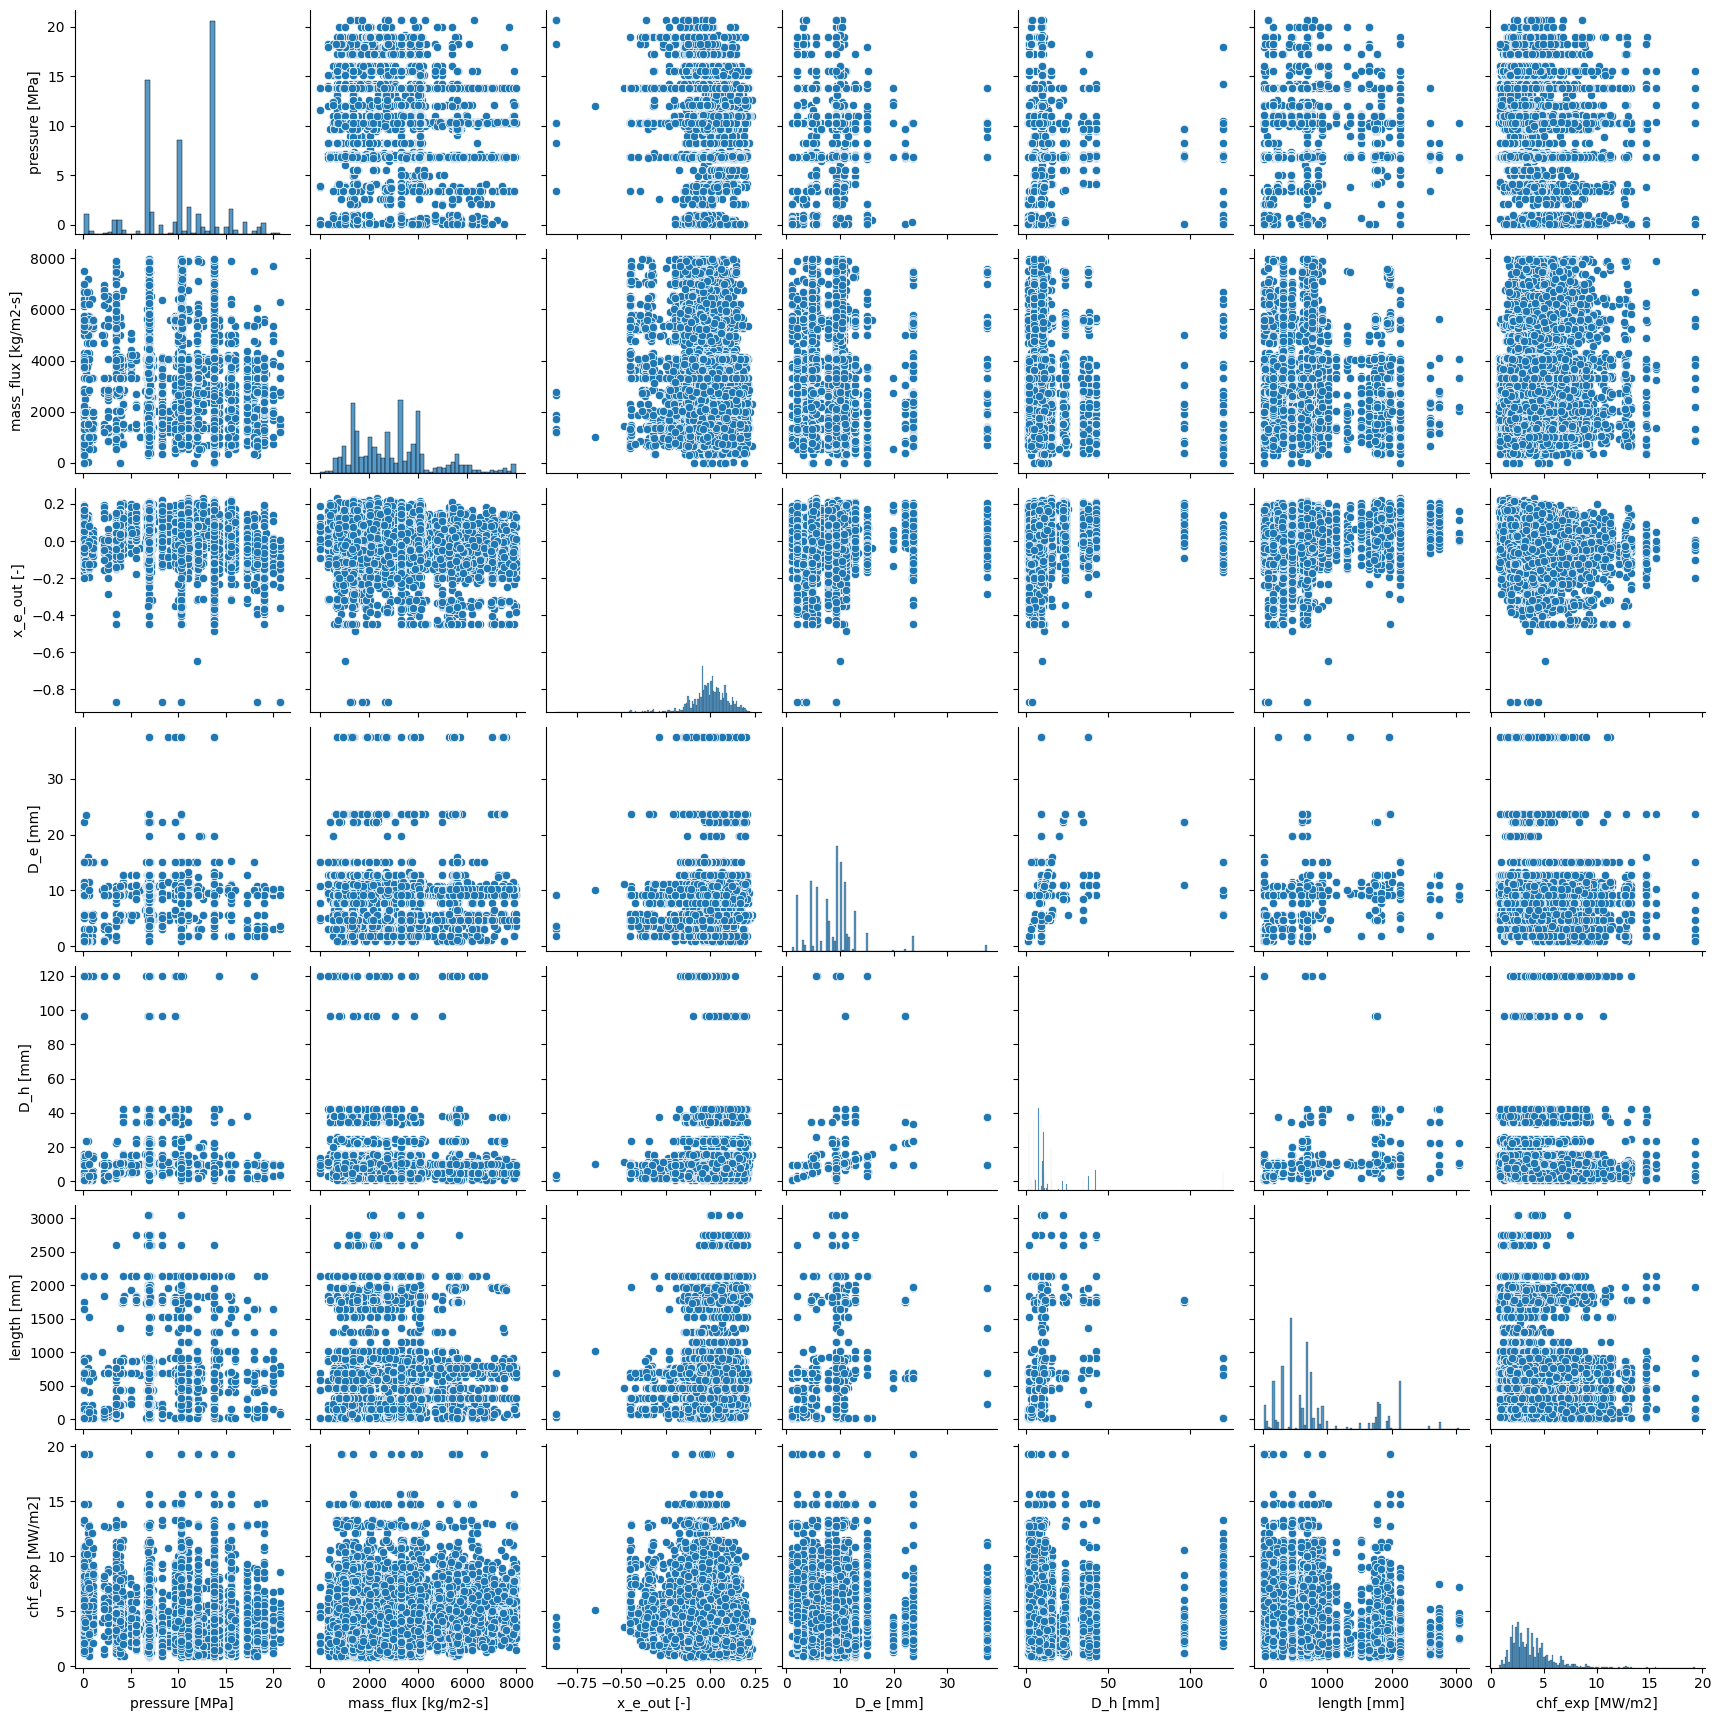

In [6]:
sns.pairplot(data_usable)

Regresion Lineal

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

In [8]:
# Separar las características (X) y la variable objetivo (y)
X = data_usable.drop('x_e_out [-]', axis=1)  # Matriz de características
y = data_usable['x_e_out [-]']  # Variable objetivo

# Identificar las columnas categóricas
categorical_cols = ['author', 'geometry']

# Definir el transformador para la codificación one-hot
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Aplicar la codificación one-hot a las variables categóricas
X_encoded = ct.fit_transform(X)

In [9]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Realizar la regresión lineal en el conjunto de entrenamiento
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
test_predictions=regression.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_squared_error
# Supongamos que tienes tus predicciones y valores reales en las variables 'y_pred' y 'y_true' respectivamente
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE:", rmse)

RMSE: 0.08508592306758714


Regresion Polinomica

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Aplicar la transformación polinómica
degree = 3  # Grado del polinomio
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train_scaled)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_poly, y_train)


LinearRegression()

In [14]:
X_new_poly = poly_features.transform(X_test_scaled)
y_pred = model.predict(X_new_poly)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1661404951.457515
